# PetroPlot Clone

## Libraries needed to run this tool

In [1]:
!pip install geopandas
!pip install pyrolite
!pip install plotly

  Using cached pyrolite-0.3.2-py3-none-any.whl (586 kB)
  Using cached mpltern-0.4.0-py3-none-any.whl (20 kB)
  Using cached tinydb-4.7.0-py3-none-any.whl (24 kB)
  Using cached periodictable-1.6.1-py2.py3-none-any.whl (752 kB)
  Using cached numpydoc-1.5.0-py3-none-any.whl (52 kB)
  Using cached sphinx-6.1.3-py3-none-any.whl (3.0 MB)
  Using cached sphinxcontrib_serializinghtml-1.1.5-py2.py3-none-any.whl (94 kB)
  Using cached alabaster-0.7.12-py2.py3-none-any.whl (14 kB)
  Using cached Pygments-2.14.0-py3-none-any.whl (1.1 MB)
  Using cached snowballstemmer-2.2.0-py2.py3-none-any.whl (93 kB)
  Using cached sphinxcontrib_devhelp-1.0.2-py2.py3-none-any.whl (84 kB)
  Using cached imagesize-1.4.1-py2.py3-none-any.whl (8.8 kB)
  Using cached sphinxcontrib_jsmath-1.0.1-py2.py3-none-any.whl (5.1 kB)
  Using cached sphinxcontrib_htmlhelp-2.0.0-py2.py3-none-any.whl (100 kB)
  Using cached sphinxcontrib.applehelp-1.0.3-py3-none-any.whl (120 kB)
  Using cached sphinxcontrib_qthelp-1.0.3-py2.py3

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import geopandas

from pyrolite.plot import pyroplot
import pyrolite.data.Aitchison
from pyrolite.util.plot.style import ternary_color
from pyrolite.util.synthetic import normal_frame 
from pyrolite.util.classification import USDASoilTexture
from pyrolite.util.plot.style import color_ternary_polygons_by_centroid

import plotly.express as px

## Data Entry and Initial Look

In [40]:
#df = pd.read_csv('<Insert Name of csv file>', index_col= '<Index number of column with label names>')
df = pd.read_csv('PetroPlot ExcelFile.csv', index_col= 0)

In [5]:
df.head

<bound method NDFrame.head of                                                                      material  \
sample_id                                                                       
KNO0115-011                                                                GL   
KNO0115-012                                                                GL   
KNO0115-013-A                                                              GL   
KNO0115-013-B                                                              GL   
KNO0115-014                                                                GL   
...                                                                       ...   
KNO0115-007-002                                                            GL   
NaN                                                                       NaN   
Query results from PETDB http://petdb.ldeo.colu...                        NaN   
Query Date                                                          5/10/2002  

In [6]:
df.tail

<bound method NDFrame.tail of                                                                      material  \
sample_id                                                                       
KNO0115-011                                                                GL   
KNO0115-012                                                                GL   
KNO0115-013-A                                                              GL   
KNO0115-013-B                                                              GL   
KNO0115-014                                                                GL   
...                                                                       ...   
KNO0115-007-002                                                            GL   
NaN                                                                       NaN   
Query results from PETDB http://petdb.ldeo.colu...                        NaN   
Query Date                                                          5/10/2002  

### Do you want to fill in the NaN values?

In [ ]:
df = df.fillna('<Value you want to replace the NaN with>')

### Do you want to drop any particular rows?

In [41]:
#label_list = ['<Names of rows you want to drop>']
#df = df.drop(labels= label_list, inplace=True, axis = '<0 for rows, 1 for columns>')

df.drop(df.tail(4).index,inplace=True) # Drop the last 4 lines
df.drop(columns=df.columns[-1], inplace=True, axis=1,) # Drop the last column
df.drop(columns=df.columns[0], inplace=True, axis=1,) # Drop the 2nd column

## Basic Stats

### Getting the shape of the data frame

In [22]:
df.shape

(117, 25)

### Getting descriptive statistics of the data frame

In [8]:
df.describe()

,SiO2,TiO2,Al2O3,FeO,FeOT,Fe2O3T,MnO,MgO,CaO,Na2O,...,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Yb,Lu
count,40.000000,40.000000,40.000000,23.000000,28.000000,47.000000,40.000000,55.000000,40.000000,40.000000,...,19.000000,19.000000,16.000000,16.00000,2.000000,16.000000,2.000000,16.000000,16.000000,19.000000
mean,49.915250,1.668000,15.316000,8.567391,9.958214,10.529787,0.185075,7.997818,11.078500,3.047500,...,10.598947,3.674211,1.400625,5.08500,0.965000,6.068750,1.345000,3.811875,3.718125,0.529316
std,0.588902,0.247316,0.541455,0.492436,0.715723,0.625997,0.015049,0.791341,0.269972,0.208324,...,2.290519,0.711691,0.191432,0.74144,0.018385,0.920825,0.007071,0.570301,0.516465,0.113059
min,48.440000,1.080000,14.180000,7.400000,8.630000,9.100000,0.160000,6.560000,10.580000,2.540000,...,5.970000,2.270000,0.930000,3.22000,0.952000,3.940000,1.340000,2.550000,2.570000,0.281000
25%,49.520000,1.535000,15.102500,8.235000,9.502500,10.115000,0.173750,7.435000,10.887500,2.947500,...,9.775000,3.370000,1.355000,4.77250,0.958500,5.735000,1.342500,3.612500,3.550000,0.485000
50%,49.845000,1.685000,15.265000,8.560000,9.790000,10.430000,0.184000,7.840000,11.030000,3.055000,...,11.110000,3.900000,1.420000,5.20000,0.965000,6.235000,1.345000,3.885000,3.785000,0.560000
75%,50.430000,1.820000,15.590000,8.835000,10.587500,11.005000,0.191000,8.440000,11.230000,3.170000,...,11.860000,4.075000,1.500000,5.44750,0.971500,6.422500,1.347500,3.962500,3.897500,0.582000
max,50.930000,2.180000,16.660000,9.390000,11.280000,11.580000,0.230000,9.570000,11.870000,3.570000,...,14.270000,4.800000,1.720000,6.21000,0.978000,7.680000,1.350000,4.860000,4.700000,0.720000


### Specific statisics for a singular column

In [9]:
#count1 = df['<dataframe_column>'].count()
#print('count: ' + str(count1))

#mean1 = df['<dataframe_column>'].mean()
#print('mean: ' + str(mean1))

#std1 = df['<dataframe_column>'].std()
#print('std: ' + str(std1))

#min1 = df['<dataframe_column>'].min()
#print('min: ' + str(min1))

#quantile1 = df['<dataframe_column>'].quantile(q=0.25)
#print('25%: ' + str(quantile1))

#quantile2 = df['<dataframe_column>'].quantile(q=0.50)
#print('50%: ' + str(quantile2))

#quantile3 = df['<dataframe_column>'].quantile(q=0.75)
#print('75%: ' + str(quantile3))

#max1 = df['<dataframe_column>'].max()
#print('max: ' + str(max1))

count1 = df['SiO2'].count()
print('count: ' + str(count1))

mean1 = df['SiO2'].mean()
print('mean: ' + str(mean1))

std1 = df['SiO2'].std()
print('std: ' + str(std1))

min1 = df['SiO2'].min()
print('min: ' + str(min1))

quantile1 = df['SiO2'].quantile(q=0.25)
print('25%: ' + str(quantile1))

quantile2 = df['SiO2'].quantile(q=0.50)
print('50%: ' + str(quantile2))

quantile3 = df['SiO2'].quantile(q=0.75)
print('75%: ' + str(quantile3))

max1 = df['SiO2'].max()
print('max: ' + str(max1))

count: 40
mean: 49.91524999999999
std: 0.5889015742062204
min: 48.44
25%: 49.52
50%: 49.845
75%: 50.43
max: 50.93


## Initial Pairplot for Exploration

In [32]:
df = df.fillna(0)

In [35]:
df = df[~df.index.duplicated()]

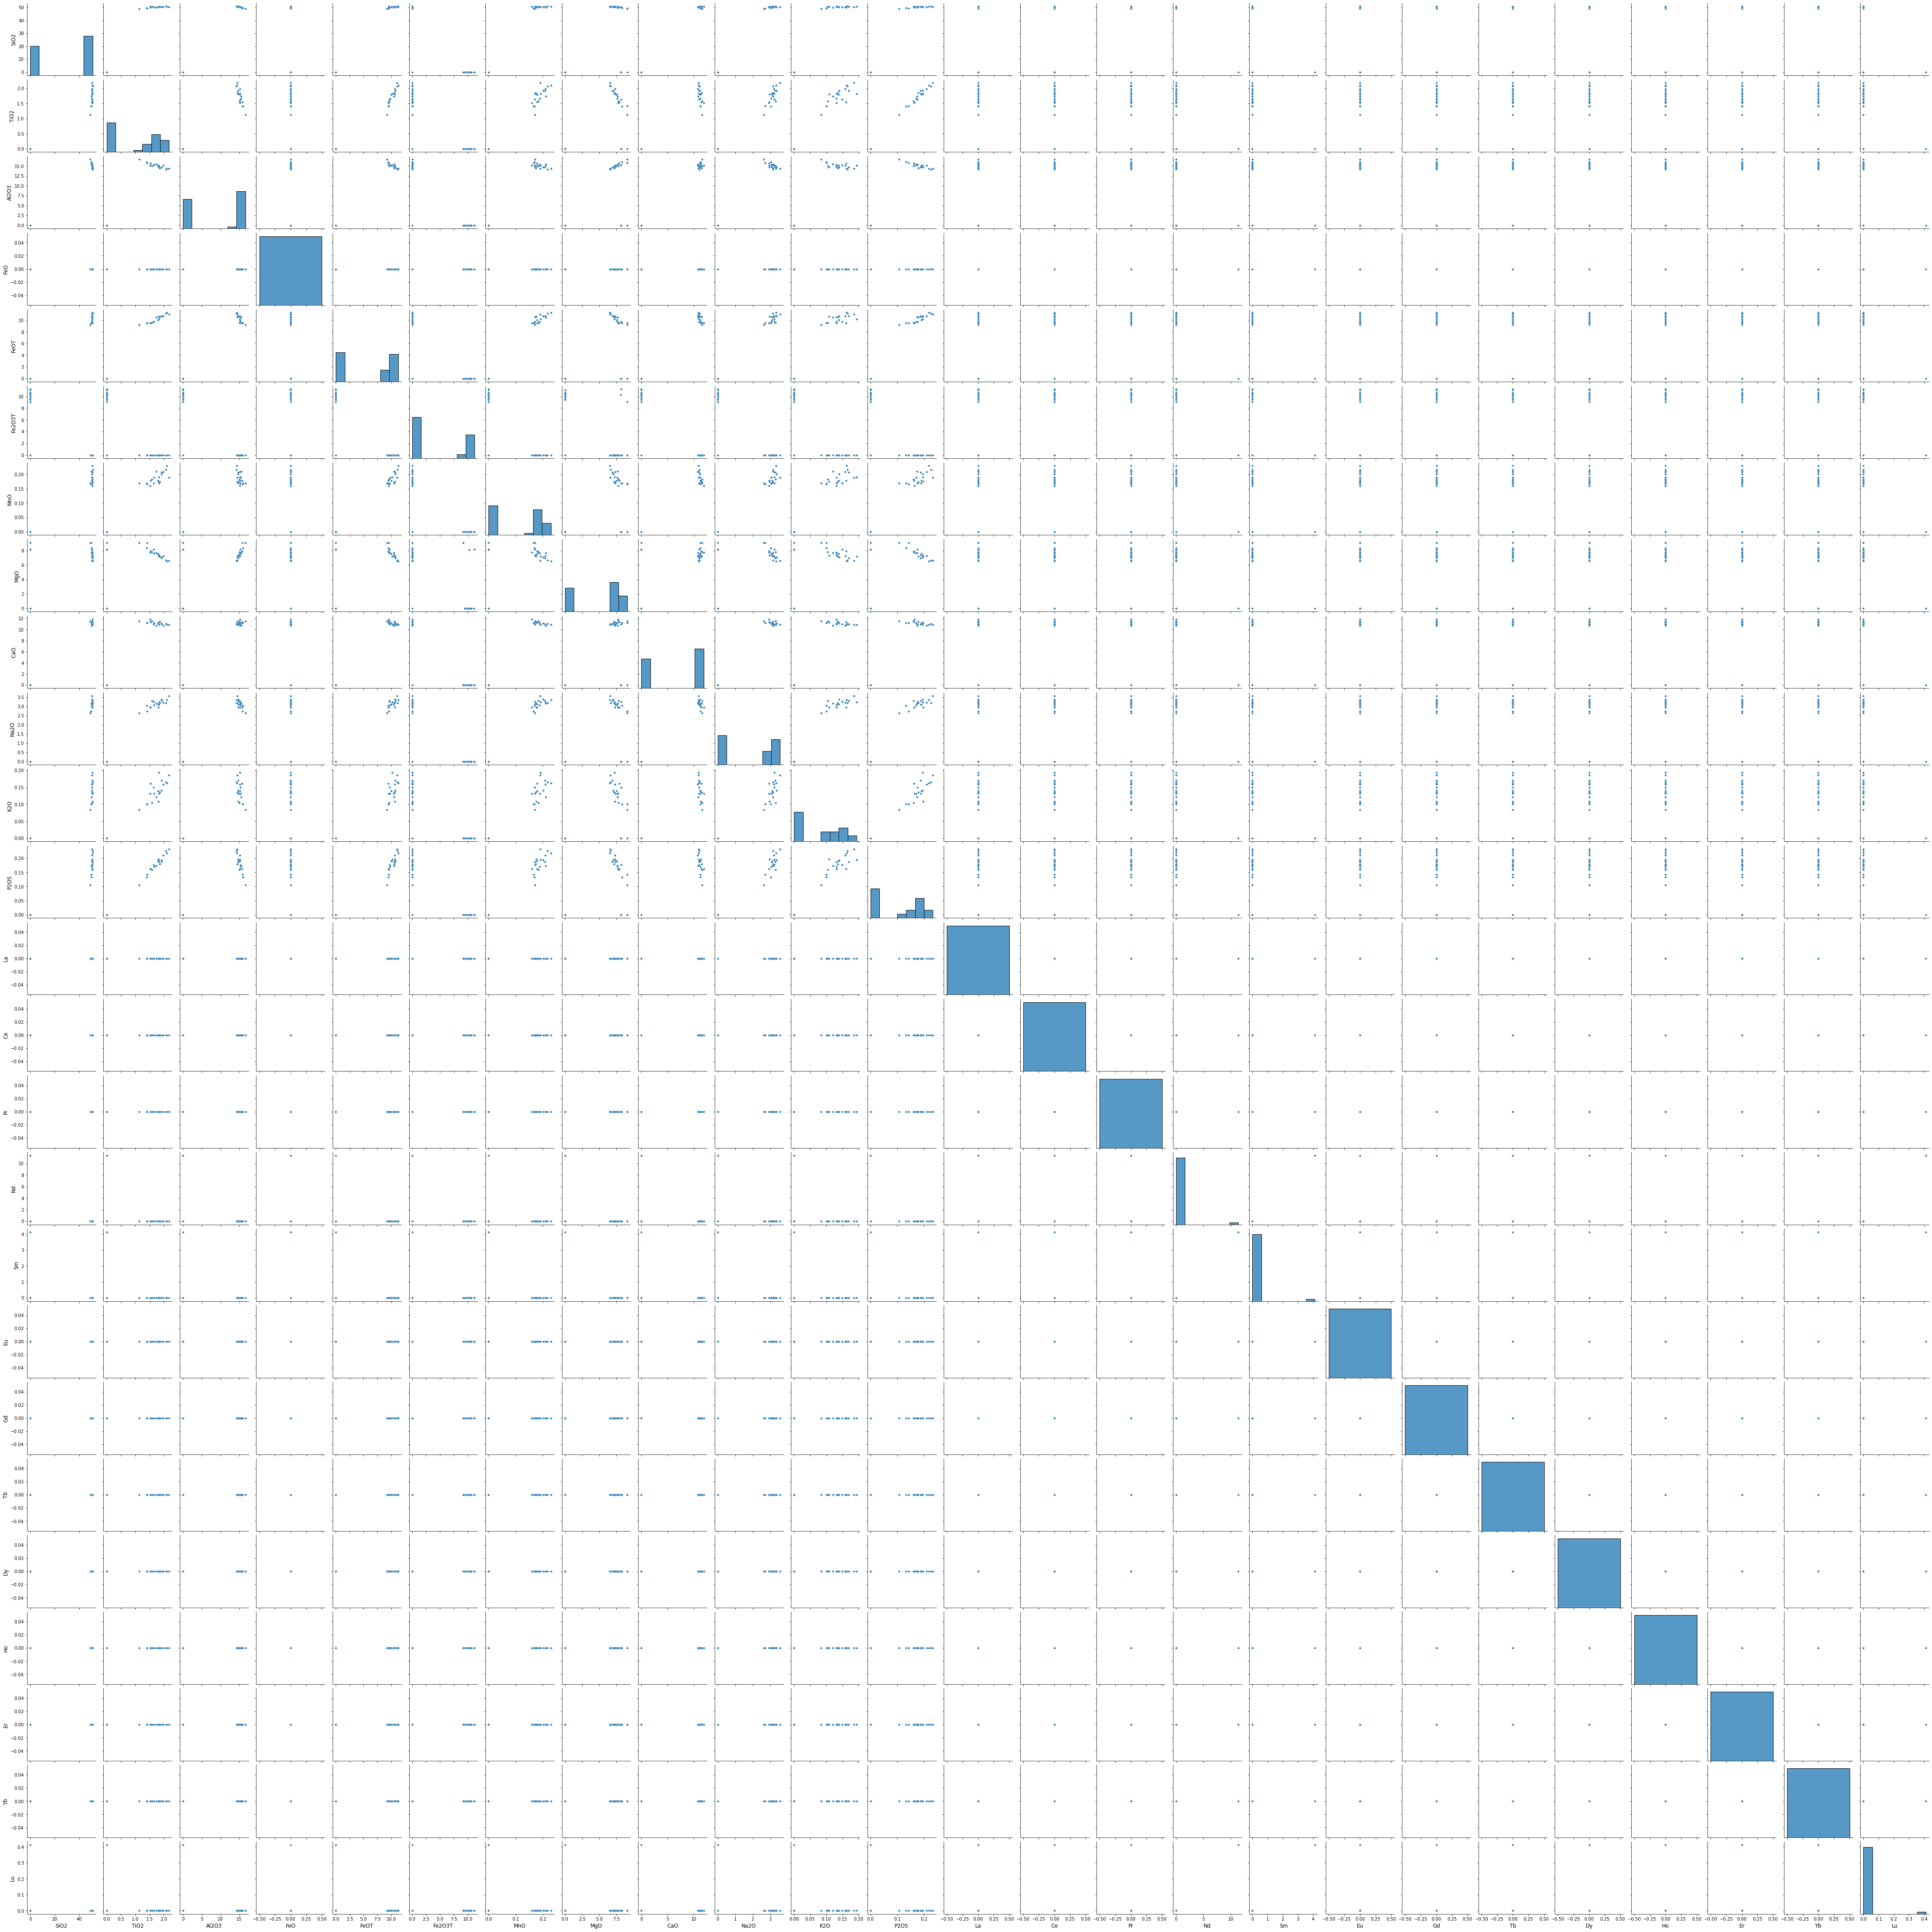

In [36]:
sns.pairplot(df)

## Specific Plots

### Scatter Plot

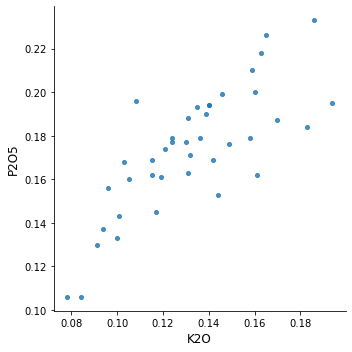

In [11]:
#sns.lmplot(x="<Column Name for X-Axis>",y="<Column Name for Y-Axis>", data=df, fit_reg=False)
#plt.xlim(<Lower Bound for X-axis>, <Upper Bound for X-axis>) # Uncomment this if you want to change the bounds of the x-axis
#plt.ylim(<Lower Bound for Y-axis>, <Upper Bound for Y-axis>) # Uncomment this if you want to change the bounds of the y-axis

sns.lmplot(x="K2O",y="P2O5", data=df, fit_reg=False)

### Box and Whisker Plot

<AxesSubplot:>

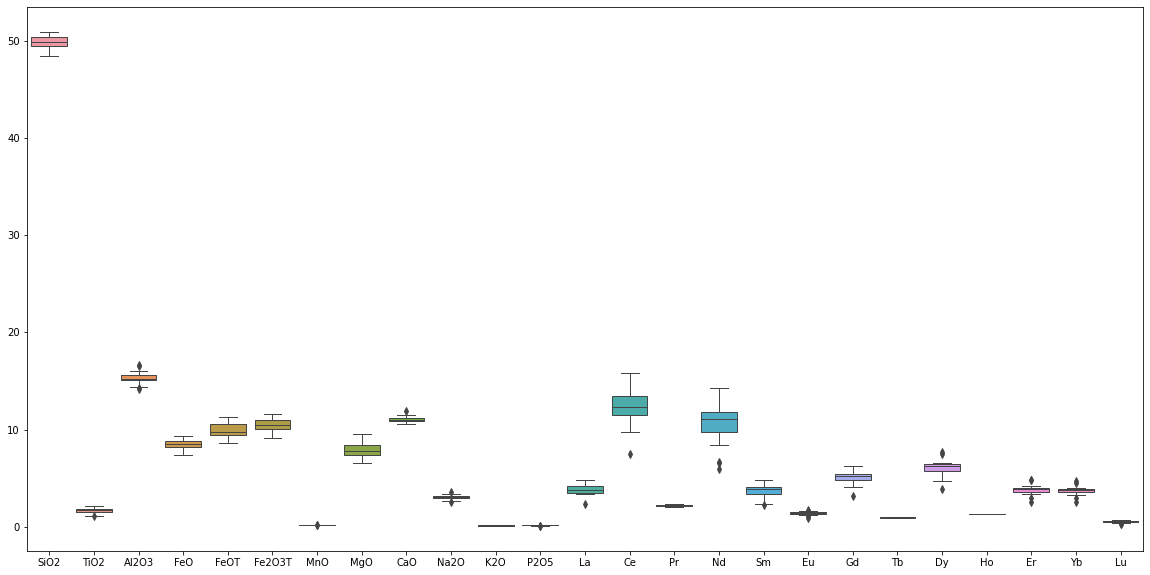

In [19]:
#sns.boxplot(data=df)

#plt.xlim(<Lower Bound for X-axis>, <Upper Bound for X-axis>) # Uncomment this if you want to change the bounds of the x-axis
#plt.ylim(<Lower Bound for Y-axis>, <Upper Bound for Y-axis>) # Uncomment this if you want to change the bounds of the y-axis

plt.figure(figsize=(20,10))
sns.boxplot(data=df)

### Bar Graph

<AxesSubplot:xlabel='K2O', ylabel='P2O5'>

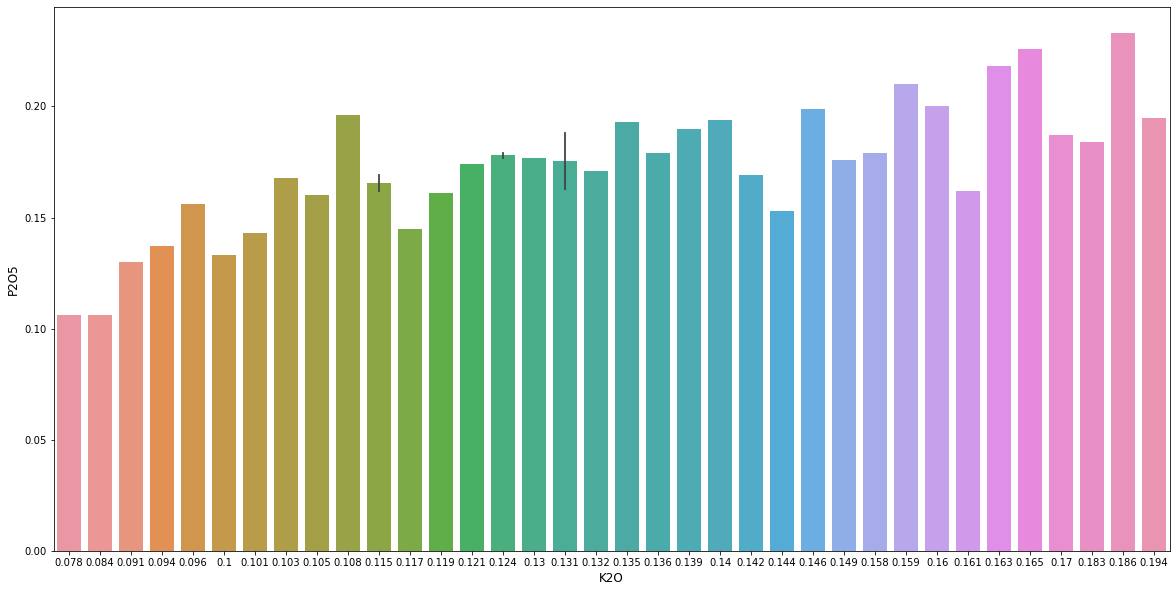

In [16]:
#sns.barplot(x="<Column Name for X-Axis>", y="<Column Name for Y-Axis>", data=df)

#plt.xlim(<Lower Bound for X-axis>, <Upper Bound for X-axis>) # Uncomment this if you want to change the bounds of the x-axis
#plt.ylim(<Lower Bound for Y-axis>, <Upper Bound for Y-axis>) # Uncomment this if you want to change the bounds of the y-axis

plt.figure(figsize=(20,10))
sns.barplot(x="K2O",y="P2O5", data=df) # So we can see all the x values

### Pie Plot

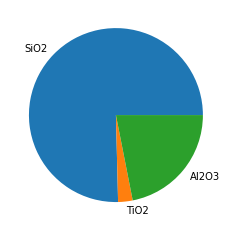

In [29]:
#data = df.iloc[<Number of which row you want to access>][start element:end element]
#labels = ["<element name>","<element name>","<element name>"]

#plt.pie(data, labels = labels)
#plt.show()

data = df.iloc[0][:3]
labels = ["SiO2","TiO2","Al2O3"]

plt.pie(data, labels = labels)
plt.show()

### Violin Plot

(0.13, 0.22)

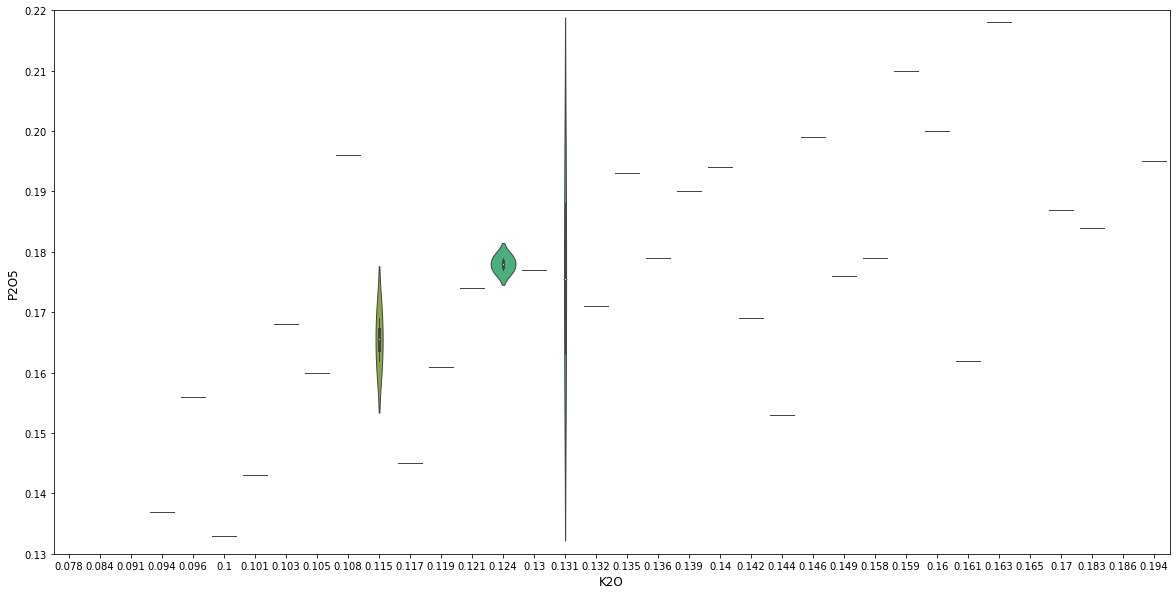

In [21]:
#plt.figure(figsize=(12,8)) # Use matplot lib to set plot dimensions
#sns.violinplot(x="<Column Name for X-Axis>", y="<Column Name for Y-Axis>", data=df)
#plt.xlim(<Lower Bound for X-axis>, <Upper Bound for X-axis>) # Uncomment this if you want to change the bounds of the x-axis
#plt.ylim(<Lower Bound for Y-axis>, <Upper Bound for Y-axis>) # Uncomment this if you want to change the bounds of the y-axis

plt.figure(figsize=(20,10)) # Use matplot lib to set plot dimensions
sns.violinplot(x="K2O",y="P2O5", data=df)
#plt.xlim(0.1, 0.13) 
plt.ylim(.13, .22) 

### Geometric Data Visualization

In [ ]:
gdf = geopandas.read_file(<Name of GeoJSON file>)

In [ ]:
gdf.plot("<Name of plot>", legend=True)

In [ ]:
gdf.explore("<Name of plot>", legend=False)

### Triangle Scatter Plot

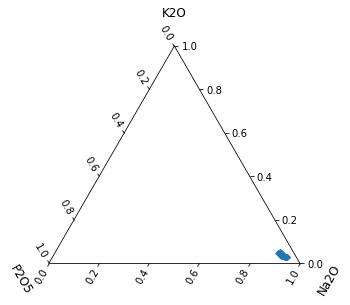

In [25]:
#ax = df.loc[:, ["<Names of three labels for each axis>"]].pyroplot.scatter()
#plt.show()

ax = df.loc[:, ["K2O", "P2O5", "Na2O"]].pyroplot.scatter()
plt.show()

### Spidergram Plot

In [47]:
df.columns

Index(['SiO2', 'TiO2', 'Al2O3', 'FeO', 'FeOT', 'Fe2O3T', 'MnO', 'MgO', 'CaO',
       'Na2O', 'K2O', 'P2O5', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb',
       'Dy', 'Ho', 'Er', 'Yb', 'Lu'],
      dtype='object')

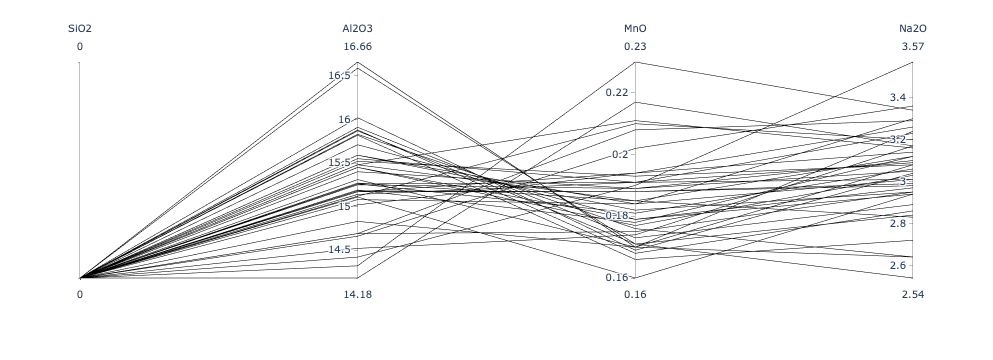

In [55]:
#fig = px.parallel_coordinates(df, color="<whhat the color bar is based on>", labels={
#                "<Key: Value pair of final bar on the side>",
#                "<Comma separated lists of each Key: Value pair of each vertical point>"},
#                             color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
#fig.show()

dfSpider = df.loc[:, ['SiO2','Al2O3', 'MnO', 'Na2O']]

fig = px.parallel_coordinates(dfSpider, color="SiO2", labels={"sample_id": "Sample ID",
                "SiO2":"SiO2","Al2O3":"Al2O3", "MnO":"MnO", "Na2O":"Na2O"},
                             color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

### Ternary Color Systems Plot

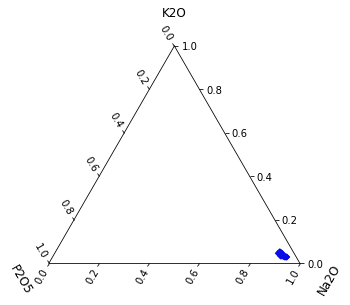

In [29]:
colors = ternary_color(df.loc[:, ["K2O", "P2O5", "Na2O"]]) 
ax = df.loc[:, ["K2O", "P2O5", "Na2O"]].pyroplot.scatter(c=colors)
plt.show()

### More to come...